In [4]:
#partie1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class Labyrinthe:
    
    def __init__(self, lignes, colonnes):
        self.lignes = lignes
        self.colonnes = colonnes
        self.grille = np.zeros((lignes, colonnes), dtype=int)  # Initialise la grille avec toutes les cellules blanches

    def generer_murs_aleatoires(self, nombre_murs):
        for _ in range(nombre_murs):
            ligne = np.random.randint(0, self.lignes)
            colonne = np.random.randint(0, self.colonnes)
            self.grille[ligne][colonne] = 1  # Définit la cellule comme un mur
            
    def afficher(self):
        plt.figure(figsize=(6, 6))  # Définit la taille de la figure
        plt.imshow(self.grille, cmap='binary')
        
        # Ajoute les lignes de la grille
        for i in range(self.lignes + 1):
            plt.axhline(i - 0.5, color='black', linewidth=2)  # Lignes horizontales entre les lignes #épaisseur de ligne de 2
        for j in range(self.colonnes + 1):
            plt.axvline(j - 0.5, color='black', linewidth=2)  # Lignes verticales entre les colonnes #épaisseur de colonnes de 2
        plt.axis('off') # Cache les axes (à la fois x et y) de la grille
        plt.show()
    

33


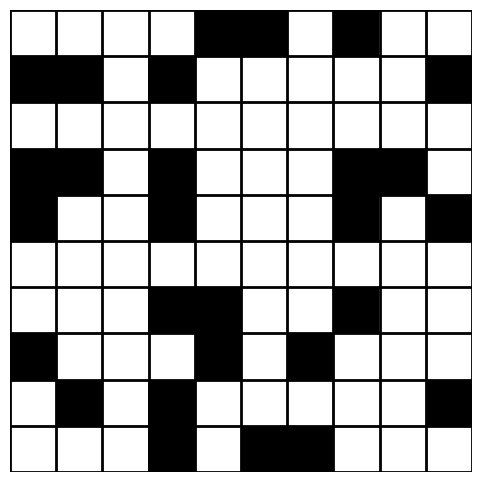

In [2]:
# Exemple d'utilisation :

lignes = 10
colonnes = 10
nombre_murs = (lignes * colonnes) // 3
print(nombre_murs)
labyrinthe = Labyrinthe(lignes, colonnes)
labyrinthe.generer_murs_aleatoires(nombre_murs)
labyrinthe.afficher()

In [ ]:
#partie2

In [3]:
    def generer_murs_aleatoires(self, nombre_murs):
        for _ in range(nombre_murs):
            ligne = np.random.randint(0, self.lignes)
            colonne = np.random.randint(0, self.colonnes)
            self.grille[ligne][colonne] = 1  # Définit la cellule comme un mur
            
        if not self.est_connecte():  # Vérifie si les cases blanches ne sont pas connectées
            print("Les cases blanches ne sont pas connectées. Relier automatiquement.")
            self.relier_cases_blanches()
            
    def est_connecte(self):
        # Recherche une cellule blanche non visitée
        def trouver_cellule_blanche_non_visitee():
            for i in range(self.lignes):
                for j in range(self.colonnes):
                    if self.grille[i][j] == 0:  # Si c'est une cellule blanche non visitée
                        return (i, j)
            return None

        # Fonction BFS pour explorer les cellules blanches connectées
        def bfs(i, j):
            queue = [(i, j)]
            while queue:
                i, j = queue.pop(0)
                if self.grille[i][j] == 0:  # Si la cellule est blanche
                    self.grille[i][j] = -1  # Marque la cellule comme visitée
                    if i > 0:
                        queue.append((i - 1, j))  # Voisin en haut
                    if i < self.lignes - 1:
                        queue.append((i + 1, j))  # Voisin en bas
                    if j > 0:
                        queue.append((i, j - 1))  # Voisin à gauche
                    if j < self.colonnes - 1:
                        queue.append((i, j + 1))  # Voisin à droite

        # Vérifie la connectivité des cellules blanches
        cellule_initiale = trouver_cellule_blanche_non_visitee()
        if cellule_initiale is None:
            return True  # Si aucune cellule blanche trouvée, alors toutes sont connectées
        bfs(cellule_initiale[0], cellule_initiale[1])

        # Vérifie si toutes les cellules blanches ont été visitées
        for i in range(self.lignes):
            for j in range(self.colonnes):
                if self.grille[i][j] == 0:
                    return False  # S'il reste des cellules blanches non visitées, les cellules ne sont pas connectées
        return True  # Toutes les cellules blanches sont connectées

    def trouver_voisins_blancs(self, i, j):
        voisins = []
        if i > 0 and self.grille[i - 1][j] == 0:
            voisins.append((i - 1, j))  # Voisin en haut
        if i < self.lignes - 1 and self.grille[i + 1][j] == 0:
            voisins.append((i + 1, j))  # Voisin en bas
        if j > 0 and self.grille[i][j - 1] == 0:
            voisins.append((i, j - 1))  # Voisin à gauche
        if j < self.colonnes - 1 and self.grille[i][j + 1] == 0:
            voisins.append((i, j + 1))  # Voisin à droite
        return voisins

    def supprimer_mur_entre(self, cellule1, cellule2):
        mur_i = (cellule1[0] + cellule2[0]) // 2
        mur_j = (cellule1[1] + cellule2[1]) // 2
        self.grille[mur_i][mur_j] = 0

    def relier_cases_blanches(self):
        while not self.est_connecte():
            # Recherche des cellules blanches dans des composantes connexes différentes
            composantes_connexes = []
            for i in range(self.lignes):
                for j in range(self.colonnes):
                    if self.grille[i][j] == 0:
                        voisins = self.trouver_voisins_blancs(i, j)
                        composantes_connexes.append((i, j, len(voisins)))
            if len(composantes_connexes) < 2:
                break  # Il n'y a pas assez de composantes pour relier

            # Trie les composantes par le nombre de voisins
            composantes_connexes.sort(key=lambda x: x[2])

            # Supprime un mur entre les deux composantes les moins connectées
            cellule1 = (composantes_connexes[0][0], composantes_connexes[0][1])
            cellule2 = (composantes_connexes[1][0], composantes_connexes[1][1])
            self.supprimer_mur_entre(cellule1, cellule2)

33


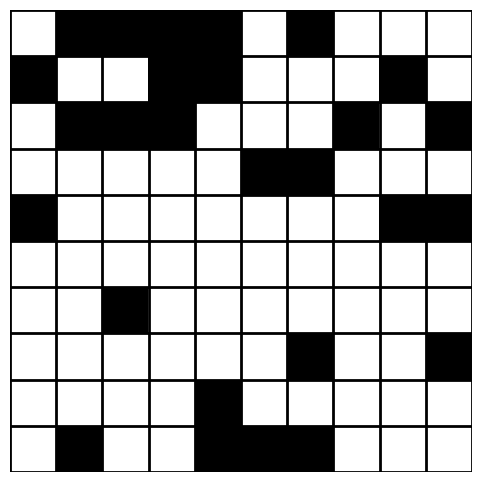

In [4]:
# Exemple d'utilisation :
lignes = 10
colonnes = 10
nombre_murs = (lignes * colonnes) // 3
print(nombre_murs)
labyrinthe = Labyrinthe(lignes, colonnes)
labyrinthe.generer_murs_aleatoires(nombre_murs)
labyrinthe.afficher()

In [ ]:
#partie3 et partie5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

class Labyrinthe:
    def __init__(self, lignes, colonnes):
        self.lignes = lignes
        self.colonnes = colonnes
        self.grille = np.zeros((lignes, colonnes), dtype=int)  # Initialise la grille avec toutes les cellules blanches

    def generer_murs_aleatoires(self, nombre_murs):
        for _ in range(nombre_murs):
            ligne = np.random.randint(0, self.lignes)
            colonne = np.random.randint(0, self.colonnes)
            self.grille[ligne][colonne] = 1  # Définit la cellule comme un mur

        while not self.est_connecte():  # Vérifie si les cases blanches sont connectées
            print("Les cases blanches ne sont pas connectées. Relier automatiquement.")
            self.grille = np.zeros((self.lignes, self.colonnes), dtype=int)  # Réinitialise la grille
            self.generer_murs_aleatoires(nombre_murs)  # Regénère les murs aléatoires

    def afficher(self, depart=None, arrivee=None, chemins=None, chemin_plus_court=None):
        plt.figure(figsize=(6, 6))  # Définit la taille de la figure
        plt.imshow(self.grille, cmap='binary')
        
        # Ajoute les lignes de la grille
        for i in range(self.lignes + 1):
            plt.axhline(i - 0.5, color='black', linewidth=2)  # Lignes horizontales entre les lignes #épaisseur de ligne de 2
        for j in range(self.colonnes + 1):
            plt.axvline(j - 0.5, color='black', linewidth=2)  # Lignes verticales entre les colonnes #épaisseur de colonnes de 2

        if depart:
            plt.plot(depart[1], depart[0], 'go', markersize=10)  # Point de départ en vert
        if arrivee:
            plt.plot(arrivee[1], arrivee[0], 'ro', markersize=10)  # Point d'arrivée en rouge

        if chemins:
            for chemin in chemins:
                chemin = np.array(chemin)
                plt.plot(chemin[:, 1], chemin[:, 0], color='blue', linewidth=2)  # Trace les chemins en bleu

        if chemin_plus_court:
            chemin_plus_court = np.array(chemin_plus_court)
            plt.plot(chemin_plus_court[:, 1], chemin_plus_court[:, 0], color='red', linewidth=2)  # Trace le chemin le plus court en rouge

        plt.axis('off') # Cache les axes (à la fois x et y) de la grille
        plt.show()

    def placer_points_depart_arrivee(self):
        depart_trouve = False
        arrivee_trouvee = False
        while not (depart_trouve and arrivee_trouvee):
            depart = (np.random.randint(0, self.lignes), np.random.randint(0, self.colonnes))
            arrivee = (np.random.randint(0, self.lignes), np.random.randint(0, self.colonnes))
            if self.grille[depart[0]][depart[1]] == 0 and self.grille[arrivee[0]][arrivee[1]] == 0:
                if self.est_chemin_accessible(depart, arrivee):
                    depart_trouve = True
                    arrivee_trouvee = True
        return depart, arrivee

    def est_chemin_accessible(self, depart, arrivee):
        chemins = self.trouver_chemins_possibles(depart, arrivee)
        return len(chemins) > 0

    def est_connecte(self):
        def bfs(i, j):
            queue = deque([(i, j)])
            visited = set()
            while queue:
                i, j = queue.popleft()
                if (i, j) not in visited:
                    visited.add((i, j))
                    if i > 0 and self.grille[i - 1][j] == 0:
                        queue.append((i - 1, j))
                    if i < self.lignes - 1 and self.grille[i + 1][j] == 0:
                        queue.append((i + 1, j))
                    if j > 0 and self.grille[i][j - 1] == 0:
                        queue.append((i, j - 1))
                    if j < self.colonnes - 1 and self.grille[i][j + 1] == 0:
                        queue.append((i, j + 1))
            return len(visited) == sum(sum(row == 0 for row in self.grille))

        cellule_initiale = (0, 0)
        return bfs(*cellule_initiale)

    def relier_cases_blanches(self):
        def bfs(i, j):
            queue = deque([(i, j)])
            visited = set()
            while queue:
                i, j = queue.popleft()
                if (i, j) not in visited:
                    visited.add((i, j))
                    if i > 0 and self.grille[i - 1][j] == 0:
                        queue.append((i - 1, j))
                    if i < self.lignes - 1 and self.grille[i + 1][j] == 0:
                        queue.append((i + 1, j))
                    if j > 0 and self.grille[i][j - 1] == 0:
                        queue.append((i, j - 1))
                    if j < self.colonnes - 1 and self.grille[i][j + 1] == 0:
                        queue.append((i, j + 1))

        while not self.est_connecte():
            cellule1 = (np.random.randint(0, self.lignes), np.random.randint(0, self.colonnes))
            cellule2 = (np.random.randint(0, self.lignes), np.random.randint(0, self.colonnes))
            self.supprimer_mur_entre(cellule1, cellule2)

    def trouver_chemins_possibles(self, depart, arrivee):
        def dfs(i, j, chemin):
            if (i, j) == arrivee:
                chemins.append(chemin)
                return
            for di, dj in [(0, -1), (0, 1), (-1, 0), (1, 0)]:
                ni, nj = i + di, j + dj
                if 0 <= ni < self.lignes and 0 <= nj < self.colonnes and self.grille[ni][nj] == 0 and (ni, nj) not in chemin:
                    dfs(ni, nj, chemin + [(ni, nj)])

        chemins = []
        dfs(*depart, [depart])
        return chemins

    def supprimer_mur_entre(self, cellule1, cellule2):
        ci, cj = cellule1
        ni, nj = cellule2
        self.grille[(ci + ni) // 2][(cj + nj) // 2] = 0



Les cases blanches ne sont pas connectées. Relier automatiquement.


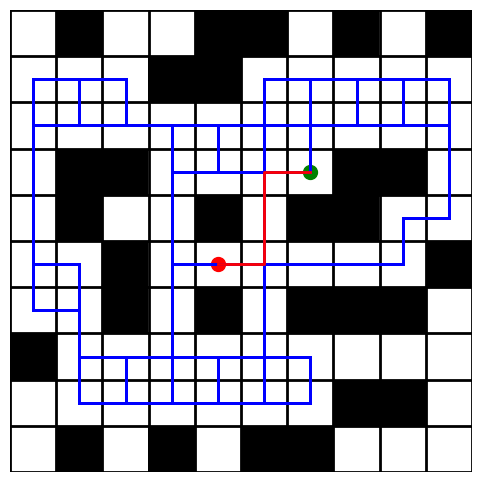

In [2]:
# Exemple d'utilisation :
lignes = 10
colonnes = 10
nombre_murs = (lignes * colonnes) // 3
labyrinthe = Labyrinthe(lignes, colonnes)
labyrinthe.generer_murs_aleatoires(nombre_murs)
depart, arrivee = labyrinthe.placer_points_depart_arrivee()
chemins = labyrinthe.trouver_chemins_possibles(depart, arrivee)
chemin_plus_court = min(chemins, key=len)
labyrinthe.afficher(depart, arrivee, chemins, chemin_plus_court)

In [ ]:
#partie4 

Entrez le nombre de lignes : 5
Entrez le nombre de colonnes : 5
Entrez votre nom d'utilisateur : oussama
Les cases blanches ne sont pas connectées. Relier automatiquement.
Les cases blanches ne sont pas connectées. Relier automatiquement.
Grille initiale :


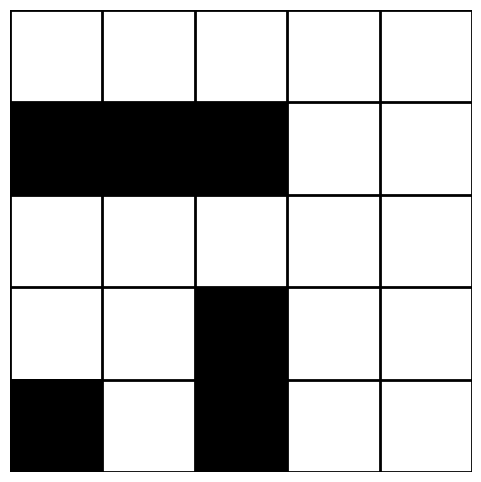

Grille finale avec les chemins :


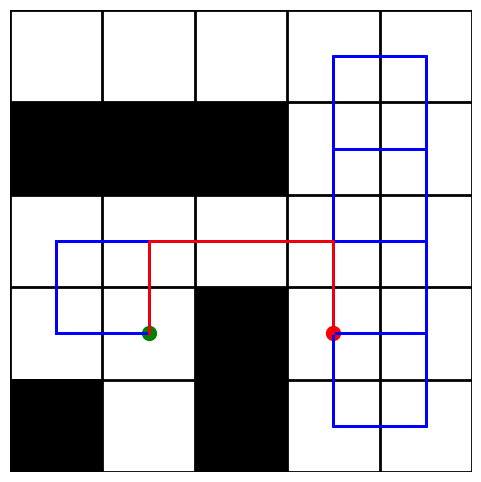

<Figure size 640x480 with 0 Axes>

In [3]:
# Exemple d'utilisation :
lignes = int(input("Entrez le nombre de lignes : "))
colonnes = int(input("Entrez le nombre de colonnes : "))
nombre_murs = (lignes * colonnes) // 3
nom_utilisateur = input("Entrez votre nom d'utilisateur : ")

labyrinthe = Labyrinthe(lignes, colonnes)
labyrinthe.generer_murs_aleatoires(nombre_murs)
depart, arrivee = labyrinthe.placer_points_depart_arrivee()
chemins = labyrinthe.trouver_chemins_possibles(depart, arrivee)
chemin_plus_court = min(chemins, key=len)

# Afficher la grille initiale
print("Grille initiale :")
labyrinthe.afficher()

# Afficher la grille finale avec les chemins
print("Grille finale avec les chemins :")
labyrinthe.afficher(depart, arrivee, chemins, chemin_plus_court)

# Enregistrer la figure dans un fichier image
plt.savefig(f"{nom_utilisateur}_labyrinthe.png")
